In [5]:
import tensorflow as tf
import numpy as np

In [7]:
from tensorflow.keras.datasets import reuters

In [8]:
(train_data, train_label),(test_data, test_label) = reuters.load_data(num_words = 10000)

In [9]:
print("train data", len(train_data))
print("test data", len(test_data))

train data 8982
test data 2246


In [5]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire=''.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [6]:
train_label[0:5]

array([3, 4, 3, 4, 4], dtype=int64)

In [7]:
print(max(train_label))
print(min(train_label))

45
0


In [10]:
def vectorized_data(seq, dimension = 10000):
    result = np.zeros((len(seq), dimension))
    for i, sequence in enumerate(seq):
        result[i, sequence] = 1
    return result

In [11]:
vec_train = vectorized_data(train_data)
vec_test = vectorized_data(test_data)

In [12]:
def one_hot_encoding(seq, dim = 46):
    result = np.zeros((len(seq), dim))
    for i, seqs in enumerate(seq):
        result[i, seqs] = 1
    return result

In [13]:
ohe_train_label = one_hot_encoding(train_label)
ohe_test_label = one_hot_encoding(test_label)

In [6]:
from tensorflow.keras import models, layers, optimizers

In [13]:
model = models.Sequential()
model.add(layers.Dense(64, input_shape = (10000,), activation = "relu"))
model.add(layers.Dense(64, activation = "relu"))
model.add(layers.Dense(46, activation = "softmax"))

In [14]:
model.compile(
    loss = "categorical_crossentropy",
    optimizer = "rmsprop",
    metrics = ['acc']
)

In [15]:
val_data = vec_train[:1000]
val_label = ohe_train_label[:1000]
paritial_train = vec_train[1000:]
partial_label = ohe_train_label[1000:]

In [16]:
history = model.fit(
    paritial_train, partial_label, epochs = 20,  batch_size = 512, validation_data = (val_data, val_label)
)

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 145us/sample - loss: 2.6547 - acc: 0.5323 - val_loss: 1.7794 - val_acc: 0.6470
Epoch 2/20
7982/7982 [==============================] - 1s 96us/sample - loss: 1.4456 - acc: 0.7032 - val_loss: 1.3079 - val_acc: 0.7190
Epoch 3/20
7982/7982 [==============================] - 1s 114us/sample - loss: 1.0677 - acc: 0.7710 - val_loss: 1.1320 - val_acc: 0.7440
Epoch 4/20
7982/7982 [==============================] - 1s 114us/sample - loss: 0.8495 - acc: 0.8145 - val_loss: 1.0376 - val_acc: 0.7700
Epoch 5/20
7982/7982 [==============================] - 1s 96us/sample - loss: 0.6858 - acc: 0.8528 - val_loss: 0.9670 - val_acc: 0.7970
Epoch 6/20
7982/7982 [==============================] - 1s 92us/sample - loss: 0.5585 - acc: 0.8819 - val_loss: 0.9137 - val_acc: 0.8040
Epoch 7/20
7982/7982 [==============================] - 1s 92us/sample - loss: 0.4502 - acc: 0.9048 - val_loss: 0.8936 - val_ac

In [15]:
import matplotlib.pyplot as plt
import pickle 

In [3]:
storagepath = "E:\\Taha\\tensorflow\\deep learning\\save\\"

In [19]:
def save_data(model, history, iteration):
    model_file = storagepath + "reuters_model" + str(iteration).strip() + ".h5"
    history_file = storagepath + "reuters_history" + str(iteration).strip() + ".pkle"
    model.save(model_file)
    with open(history_file, "wb") as fp:
        pickle.dump(history_file, fp)
    return model, history

In [1]:
def load_data(iteration):
    model_file = storagepath + "reuters_model" + str(iteration).strip() + ".h5"
    history_file = storagepath + "reuters_history" + str(iteration).strip() + ".pkle"
    model = models.load_model(model_file)
    with open(history_file, 'rb') as  fp:
        history = pickle.load(fp)
    return model, pickle

In [21]:
save_data(model, history, 1)
print(model, history,"saved")

<tensorflow.python.keras.engine.sequential.Sequential object at 0x00000264C5B93E48> <tensorflow.python.keras.callbacks.History object at 0x00000264C5286B70> saved


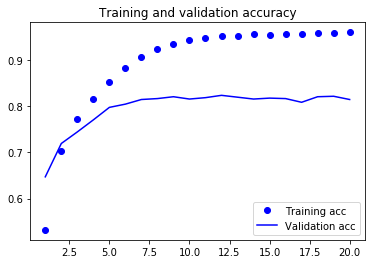

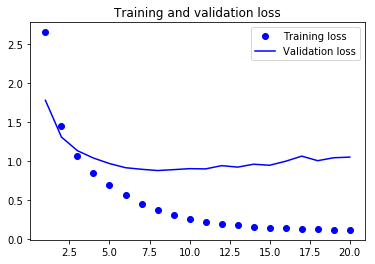

In [22]:
history = history.history
acc = history['acc']
val_acc = history['val_acc']
loss = history['loss']
val_loss = history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [29]:
model = models.Sequential()
model.add(layers.Dense(64, input_shape = (10000,), activation = "relu"))
model.add(layers.Dense(64, activation = "relu"))
model.add(layers.Dense(46, activation = "softmax"))
model.compile(
    loss = "categorical_crossentropy",
    optimizer = "rmsprop",
    metrics = ['acc']
)
history = model.fit(
    paritial_train, partial_label, epochs = 9,  batch_size = 512, validation_data = (val_data, val_label)
)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 143us/sample - loss: 2.5341 - acc: 0.4987 - val_loss: 1.6843 - val_acc: 0.6200
Epoch 2/9
7982/7982 [==============================] - 1s 100us/sample - loss: 1.4113 - acc: 0.6885 - val_loss: 1.3071 - val_acc: 0.6950
Epoch 3/9
7982/7982 [==============================] - 1s 102us/sample - loss: 1.0631 - acc: 0.7699 - val_loss: 1.1337 - val_acc: 0.7400
Epoch 4/9
7982/7982 [==============================] - 1s 96us/sample - loss: 0.8354 - acc: 0.8201 - val_loss: 1.0138 - val_acc: 0.7890
Epoch 5/9
7982/7982 [==============================] - 1s 100us/sample - loss: 0.6603 - acc: 0.8617 - val_loss: 0.9752 - val_acc: 0.7980
Epoch 6/9
7982/7982 [==============================] - 1s 96us/sample - loss: 0.5270 - acc: 0.8921 - val_loss: 0.9034 - val_acc: 0.8100
Epoch 7/9
7982/7982 [==============================] - 1s 100us/sample - loss: 0.4269 - acc: 0.9123 - val_loss: 0.8892 - val_acc: 0.

<tensorflow.python.keras.engine.sequential.Sequential object at 0x0000026480A7DC18> <tensorflow.python.keras.callbacks.History object at 0x0000026481118A90> saved


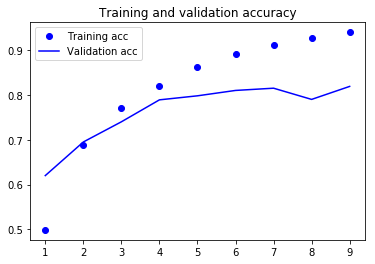

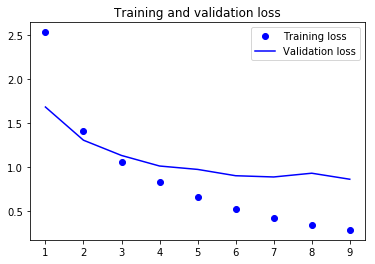

In [30]:
save_data(model, history, 2)
print(model, history,"saved")
history = history.history
acc = history['acc']
val_acc = history['val_acc']
loss = history['loss']
val_loss = history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [27]:
model = models.Sequential()
model.add(layers.Dense(64, input_shape = (10000,), activation = "relu"))
model.add(layers.Dense(64, activation = "relu"))
model.add(layers.Dense(46, activation = "softmax"))
model.compile(
    loss = "categorical_crossentropy",
    optimizer = "rmsprop",
    metrics = ['acc']
)
history = model.fit(
    paritial_train, partial_label, epochs = 30,  batch_size = 512, validation_data = (val_data, val_label)
)

Train on 7982 samples, validate on 1000 samples
Epoch 1/30
7982/7982 [==============================] - 1s 139us/sample - loss: 2.5292 - acc: 0.5288 - val_loss: 1.7197 - val_acc: 0.6350
Epoch 2/30
7982/7982 [==============================] - 1s 96us/sample - loss: 1.4189 - acc: 0.6922 - val_loss: 1.3355 - val_acc: 0.7090
Epoch 3/30
7982/7982 [==============================] - 1s 100us/sample - loss: 1.0685 - acc: 0.7676 - val_loss: 1.1696 - val_acc: 0.7390
Epoch 4/30
7982/7982 [==============================] - 1s 94us/sample - loss: 0.8403 - acc: 0.8208 - val_loss: 1.0334 - val_acc: 0.7810
Epoch 5/30
7982/7982 [==============================] - 1s 102us/sample - loss: 0.6637 - acc: 0.8593 - val_loss: 1.0027 - val_acc: 0.7860
Epoch 6/30
7982/7982 [==============================] - ETA: 0s - loss: 0.5266 - acc: 0.891 - 1s 94us/sample - loss: 0.5273 - acc: 0.8915 - val_loss: 0.9232 - val_acc: 0.8040
Epoch 7/30
7982/7982 [==============================] - 1s 94us/sample - loss: 0.4190 - a

<tensorflow.python.keras.engine.sequential.Sequential object at 0x00000264C64A18D0> <tensorflow.python.keras.callbacks.History object at 0x0000026480970CC0> saved


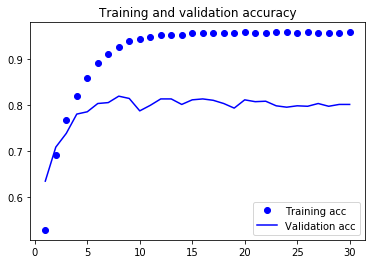

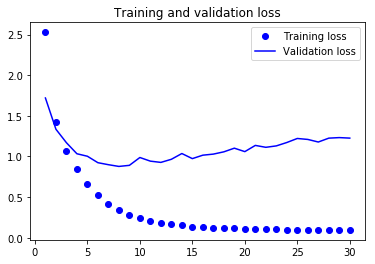

In [28]:
save_data(model, history, 3)
print(model, history,"saved")
history = history.history
acc = history['acc']
val_acc = history['val_acc']
loss = history['loss']
val_loss = history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [31]:
model.evaluate(vec_test, ohe_test_label)

2246/2246 [==============================] - 0s 174us/sample - loss: 0.9658 - acc: 0.7903


[0.9658000348193881, 0.7902939]

In [16]:
model, history = load_data(2)

In [17]:
prediction = model.predict(vec_test)

In [18]:
prediction.shape

(2246, 46)

In [19]:
np.sum(prediction[0])

1.0000001

In [20]:
np.argmax(prediction[0])

3